## Importing the python module

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas

# Any results you write to the current directory are saved as output.
'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

![Skyline](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/1_singapore_city_skyline_dusk_panorama_2011_%28cropped_for_Wikivoyage%29.jpg/1920px-1_singapore_city_skyline_dusk_panorama_2011_%28cropped_for_Wikivoyage%29.jpg)

![Singapore Airbnb](https://cdn.dnaindia.com/sites/default/files/styles/full/public/2019/06/17/837540-airbnb-logo.jpg)

![Map](https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Singapore_Districts.png/1920px-Singapore_Districts.png)

In [2]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
df = pd.read_csv('listings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [4]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 0.97 MB --> 0.59 MB (Decreased by 39.1%)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int32  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int32  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float32
 7   longitude                       7907 non-null   float32
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int16  
 10  minimum_nights                  7907 non-null   int16  
 11  number_of_reviews               7907 non-null   int16  
 12  last_review                     51

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.795799,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.785210,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.796669,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.957123,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.959633,Private room,94,1,22,2019-07-28,0.22,9,355


In [7]:
df.shape

(7907, 16)

In [8]:
#finding count of total null values in each column
df.isna().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

** Dealing with missing values**

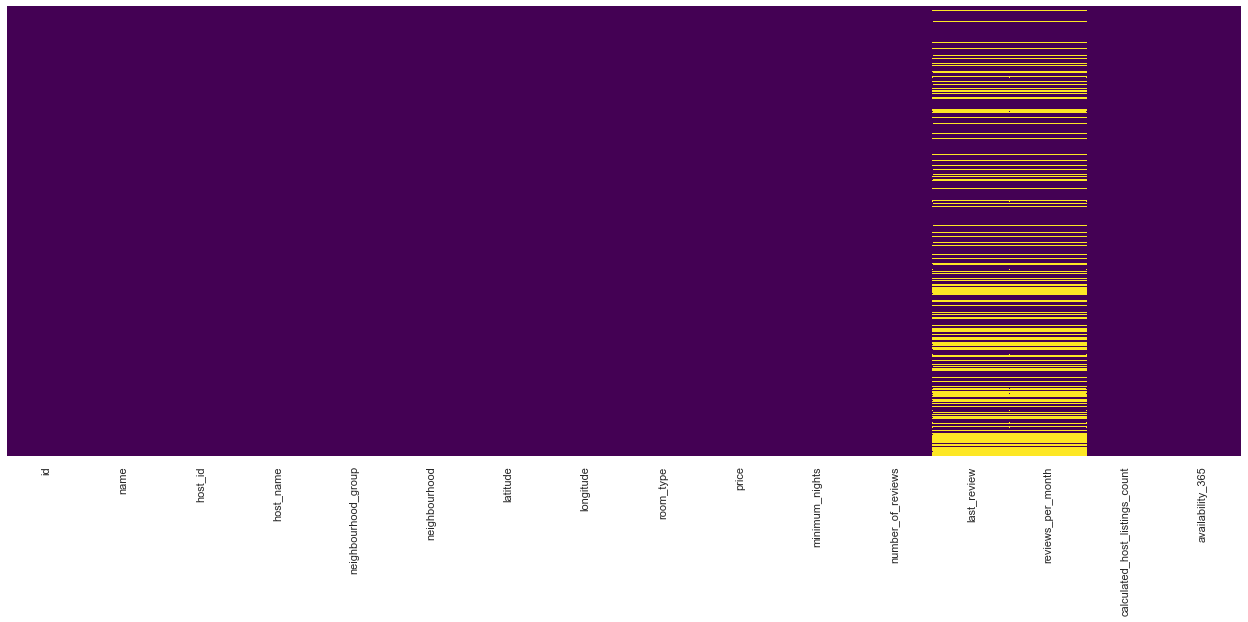

In [9]:
sns.set(rc={'figure.figsize':(19.7,8.27)})

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
start_mem = df.memory_usage().sum() / 1024**2

In [11]:
#Fields not needed to our problem
to_drop = ["last_review","reviews_per_month"]
    
# Drop selected fields in place
df.drop(to_drop, inplace=True, axis=1)    

In [12]:
df.dropna(inplace=True)
df.shape

(7905, 14)

In [13]:
end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))

Memory usage of dataframe is 0.59 MB --> 0.56 MB (Decreased by 5.2%)


## Exploratory Data Analysis

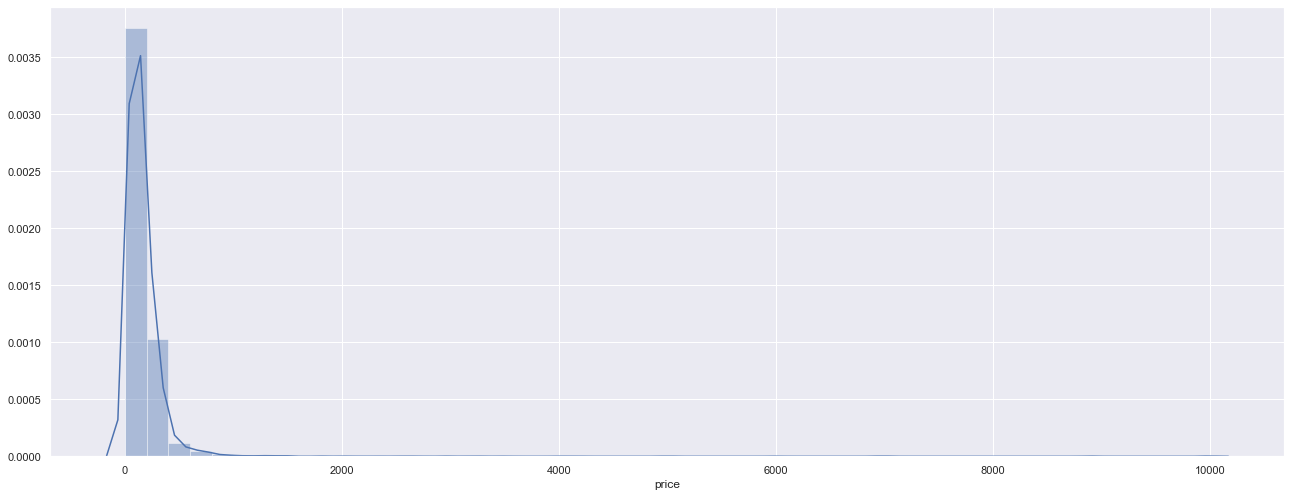

In [14]:
sns.distplot(df["price"])


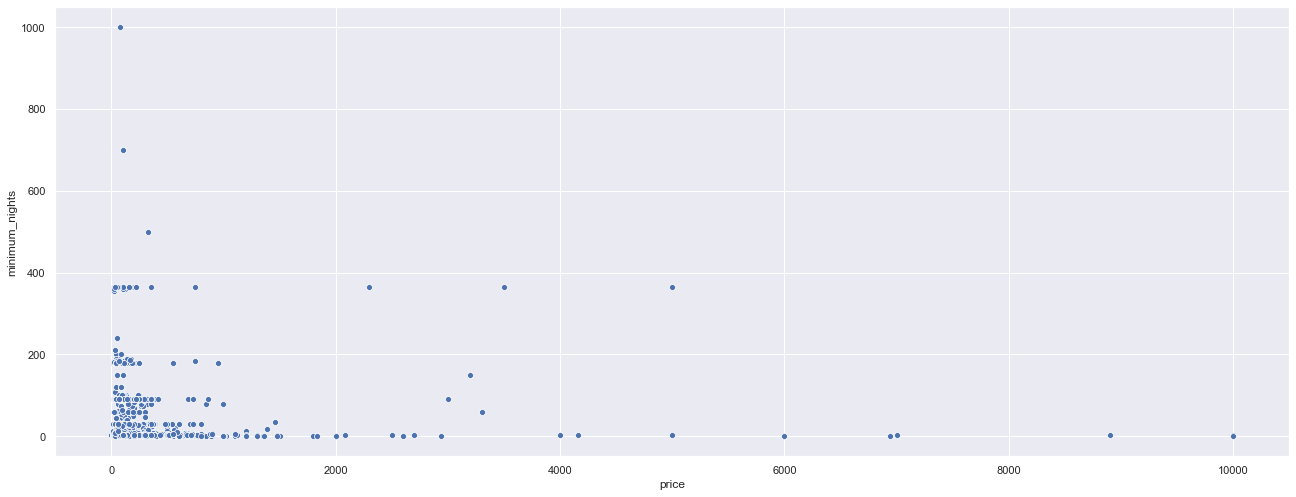

In [15]:
sns.scatterplot(x='price',y='minimum_nights',data=df)

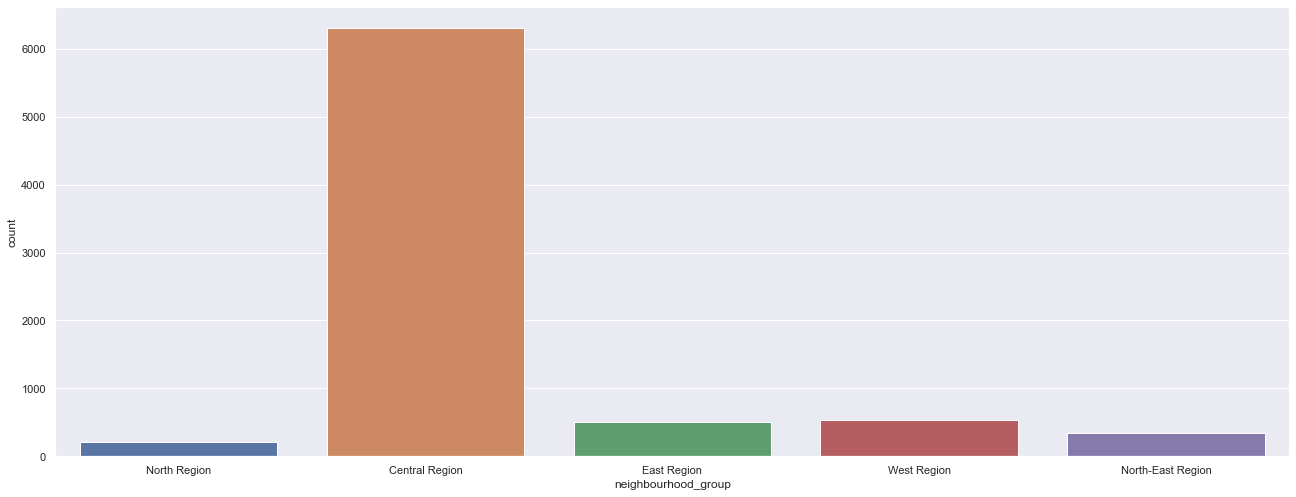

In [16]:
sns.countplot(df["neighbourhood_group"])

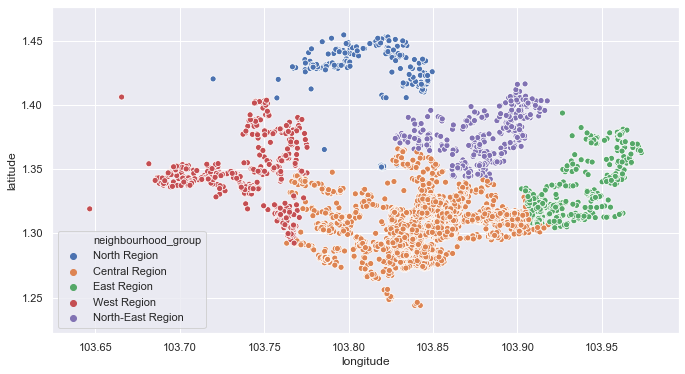

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

**Hotel Distribution through a Heat Map**

In [18]:
import folium
from folium.plugins import HeatMap
m=folium.Map([1.44255,103.79580],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

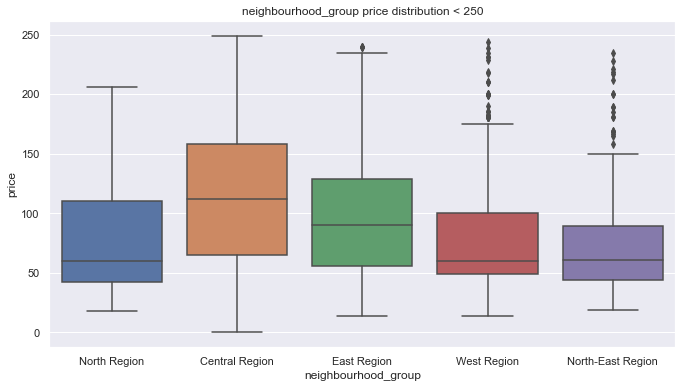

In [19]:
ng = df[df.price <250]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 250")
plt.show()

> >Central_Region has the most expensive accomodation followed by East_Region
 

 **Getting the room details**

In [20]:
import plotly.offline as pyo
import plotly.graph_objs as go
roomdf = df.groupby('room_type').size()/df['room_type'].count()*100
labels = roomdf.index
values = roomdf.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

> > We can see that Entirehome/apt is most prefered and Shared room is least preffered

**Room types occupied by neighbourhood_group**

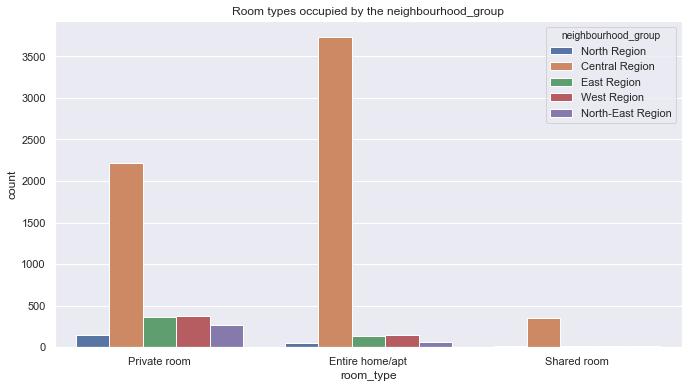

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

<Figure size 720x432 with 0 Axes>

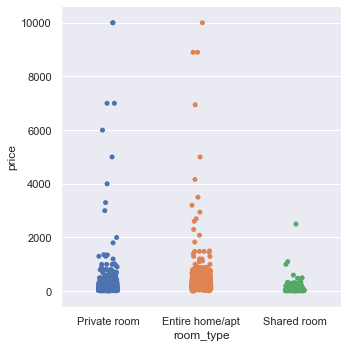

In [22]:
#catplot room type and price
plt.figure(figsize=(10,6))
sns.catplot(x="room_type", y="price", data=df);
plt.ioff()

> >We can clearly see that most of all room types lie below 2000. 

<Figure size 720x432 with 0 Axes>

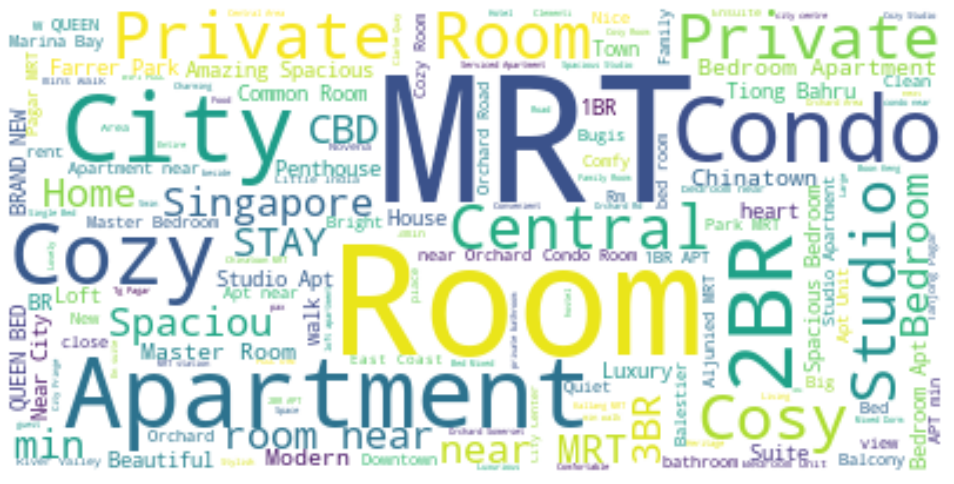

In [23]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.show()

> > Our word cloud shows the words that are more often used in the Name of this listings

In [24]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in df.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)
        
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_20_w=Counter(_names_for_count_).most_common()
_top_20_w=_top_20_w[0:20]



#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_20_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'room'),
 Text(0, 0, 'mrt'),
 Text(0, 0, 'in'),
 Text(0, 0, 'near'),
 Text(0, 0, '@'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'to'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'apt'),
 Text(0, 0, '&'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'city'),
 Text(0, 0, 'private'),
 Text(0, 0, '2'),
 Text(0, 0, 'for'),
 Text(0, 0, 'spacious'),
 Text(0, 0, 'with'),
 Text(0, 0, 'condo'),
 Text(0, 0, '-'),
 Text(0, 0, 'cozy')]

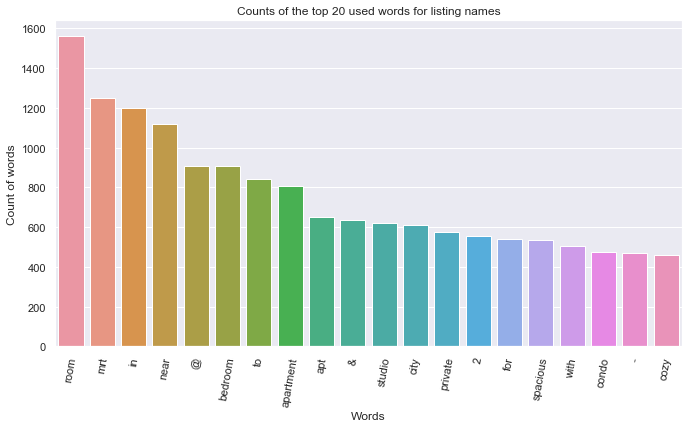

In [25]:
#we are going to use barplot for this visualization
plt.figure(figsize=(10,6))
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 20 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

**Sorting rooms according to maximum number of reviews**

In [26]:
df1=df.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
132,2129215,Luxuriously Spacious Studio Apt.,7642747,Shirley,East Region,Bedok,1.32122,103.914917,Entire home/apt,139,2,323,1,239
140,2357514,Heritage Shophouse Right in Epicentre of Sights,1346787,Val,Central Region,Outram,1.28448,103.843597,Private room,69,1,307,3,315
470,5827998,The Lily Room,30080617,Eddie,East Region,Tampines,1.34463,103.961067,Private room,60,2,296,7,0
1237,10848771,Spacious room near Woodleigh MRT,44793532,Yuan,Central Region,Toa Payoh,1.33431,103.875542,Private room,49,1,296,2,288
722,7605283,"Clean cosy room, 7 mins to Sentosa",34333799,Felix,Central Region,Bukit Merah,1.27718,103.821671,Private room,72,3,291,1,186


**Map below showing rooms with Highest number of reviews**

In [27]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
print('Rooms with the most number of reviews')
Long=103.91492
Lat=1.32122
mapdf1=folium.Map([Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df1.latitude,df1.longitude,df1.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Rooms with the most number of reviews


**Room Availability**

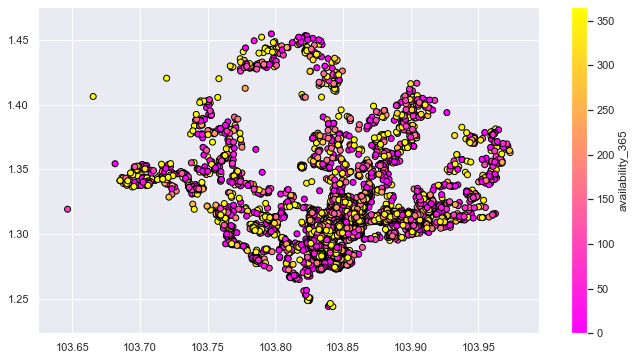

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='spring', edgecolor='black', linewidth=1\
            , alpha=1)

cbar = plt.colorbar()
cbar.set_label('availability_365')

<Figure size 720x432 with 0 Axes>

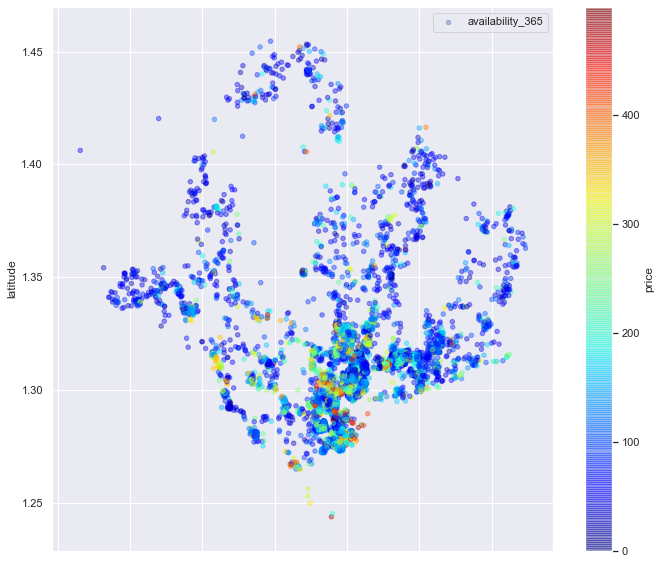

In [29]:
plt.figure(figsize=(10,6))
sub_6=df[df.price<500]
viz_4=sub_6.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
viz_4.legend()
plt.ioff()

> > Red color dots are the apartment or rooms with higher price.

## Predictions using machine learnng model 

In [30]:
#prepare data
df.drop(['name','id','host_name'],axis=1,inplace=True)


**Converting categorical features to numeric features**

In [31]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(df['neighbourhood_group'])
df['neighbourhood_group']=le.transform(df['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(df['neighbourhood'])
df['neighbourhood']=le.transform(df['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])

df.sort_values(by='price',ascending=True,inplace=True)

df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
3168,114674497,0,29,1.30954,103.852707,0,0,3,9,6,351
2567,108408404,0,19,1.30823,103.894608,1,14,2,1,1,0
7674,29799617,0,11,1.31455,103.883232,0,14,3,4,1,34
7249,75175440,4,5,1.38400,103.763092,0,14,1,1,2,0
2557,21900076,1,1,1.33698,103.932930,2,14,1,0,2,0


**Training a model**

In [32]:
#Train Linear Regression model

lm = LinearRegression()

X = df[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Getting predictions**

In [33]:
predicts = lm.predict(X_test)
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()})
error_airbnb.head()

,Actual Values,Predicted Values
0,287,245.724616
1,76,179.212589
2,99,227.200114
3,199,203.291901
4,218,166.521814


In [34]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()